In [141]:
import torch
import numpy as np
import json

In [78]:
base_data_path = "/home/laura/analyse-llms/outputs/pythia70m-base_calculation_data_probs50000.p" # 50000
base_data = torch.load(base_data_path)

sft_data_path = "/home/laura/analyse-llms/outputs/pythia70m-sft_calculation_data_probs50000.p" # 50000
sft_data = torch.load(sft_data_path)

dpo_data_path = "/home/laura/analyse-llms/outputs/pythia70m-dpo_calculation_data_probs50000.p" # 50000
dpo_data = torch.load(dpo_data_path)

In [145]:
base_perplexity_path = "/home/laura/analyse-llms/outputs/pythia70m-base-50000.json" # 50000
sft_perplexity_path = "/home/laura/analyse-llms/outputs/pythia70m-sft-50000.json" # 50000
dpo_perplexity_path = "/home/laura/analyse-llms/outputs/pythia70m-dpo-50000.json" # 50000

with open(base_perplexity_path,'r') as file: 
    base_perplexity_data = json.loads(file.read())

with open(sft_perplexity_path,'r') as file: 
    sft_perplexity_data = json.loads(file.read())

with open(dpo_perplexity_path,'r') as file: 
    dpo_perplexity_data = json.loads(file.read())


In [143]:
base_perplexity_data

{'entropy': 2.9469408988952637, 'perplexity': 19.047595977783203}

In [146]:
sft_perplexity_data

{'entropy': 3.3237063884735107, 'perplexity': 27.763063430786133}

In [147]:
dpo_perplexity_data

{'entropy': 3.400749921798706, 'perplexity': 29.98657989501953}

## Plot CDF of average token probability on The Pile val

In [120]:
probs_base = np.concatenate(base_data["mean_probs"]).mean(0)
probs_base_list = list(probs_base)

probs_sft = np.concatenate(sft_data["mean_probs"]).mean(0)
probs_sft.shape# (50304,)
probs_sft_list = list(probs_sft)

probs_dpo = np.concatenate(dpo_data["mean_probs"]).mean(0)
probs_dpo_list = list(probs_dpo)

In [121]:
base_order = np.argsort(probs_base_list)

In [122]:
sft_order = np.argsort(probs_sft_list)

In [123]:
dpo_order = np.argsort(probs_dpo_list)

In [124]:
# probs_base_list.sort(reverse=True)
probs_base_list_sorted = sorted(probs_base_list, reverse=True)
# probs_base_list

In [125]:
# probs_sft_list
probs_sft_list_sorted = sorted(probs_sft_list, reverse=True) # takes up more memory
# probs_sft_list.sort(reverse=True)
# probs_sft_list

In [126]:
probs_dpo_list_sorted = sorted(probs_dpo_list, reverse=True)
# probs_dpo_list.sort(reverse=True)
# probs_dpo_list

In [136]:
base_cdf = np.cumsum(probs_base_list_sorted)
sft_cdf = np.cumsum(probs_sft_list_sorted)
dpo_cdf = np.cumsum(probs_dpo_list_sorted)

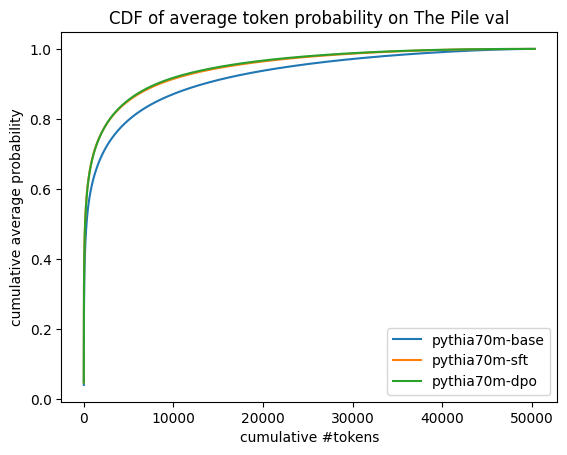

In [150]:
from matplotlib import pyplot as plt
plt.plot(base_cdf, label="pythia70m-base")
plt.plot(sft_cdf, label="pythia70m-sft")
plt.plot(dpo_cdf, label="pythia70m-dpo")
plt.title("CDF of average token probability on The Pile val")
plt.xlabel("#tokens")
plt.ylabel("cumulative average probability")
plt.legend()

(0.8, 1.0)

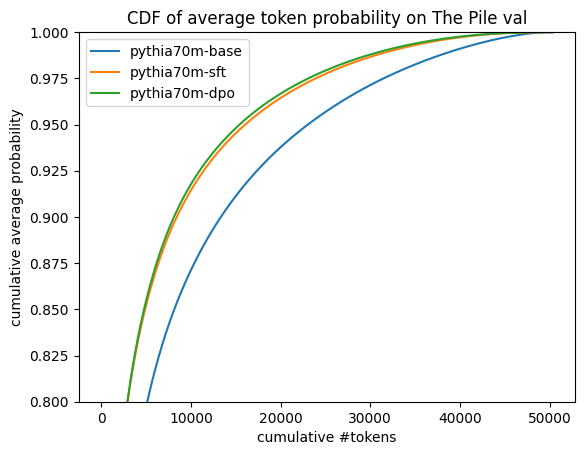

In [149]:
from matplotlib import pyplot as plt
plt.plot(base_cdf, label="pythia70m-base")
plt.plot(sft_cdf, label="pythia70m-sft")
plt.plot(dpo_cdf, label="pythia70m-dpo")
plt.title("CDF of average token probability on The Pile val")
plt.xlabel("#tokens")
plt.ylabel("cumulative average probability")
plt.legend()
plt.ylim((0.8,1))

## Other

In [116]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import torch
device = "cuda:0" 

In [117]:
model_base = GPTNeoXForCausalLM.from_pretrained("EleutherAI/pythia-70m",).to(device)
model_sft = GPTNeoXForCausalLM.from_pretrained("lomahony/eleuther-pythia70m-hh-sft",).to(device)

tokenizer = AutoTokenizer.from_pretrained("lomahony/eleuther-pythia70m-hh-sft",)

In [130]:
base_order

array([28696,   674, 39743, ...,   253,    15,   187])

In [131]:
tokenizer.convert_ids_to_tokens(base_order)

['FFIRMED',
 'ĠĠĠĠĠ',
 '14514500',
 'Ġaffidav',
 'Ġbiomark',
 'marined',
 'Ġcareg',
 'imonit',
 'Ġtaxp',
 'Ġ{Â¶',
 'ĠĠĠĠĠĠĠĠ',
 'ÃĥÃĤÃĥÃĤ',
 'medsc',
 'ortunately',
 'Ġearthqu',
 'ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ',
 'ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ',
 'rsfs',
 '1451450014514500',
 'Ġpractition',
 'ĠĠĊĠ',
 'ĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĊĠ',
 'ĊĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 None,
 'ĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'čĊĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĊĠ',
 'ĠĠĠĊ',
 'ĊĠĠĠĠĊĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ

In [132]:
probs_base_list[45000:]

[1.8791942e-06,
 2.5751788e-06,
 5.8809724e-06,
 2.1952064e-06,
 1.8014493e-06,
 1.4527232e-06,
 2.655592e-06,
 2.3571895e-06,
 2.1268615e-06,
 4.78819e-07,
 1.3839075e-06,
 2.0517734e-06,
 1.742076e-06,
 1.4303847e-06,
 9.00499e-07,
 1.6366532e-06,
 2.7422302e-06,
 1.5500931e-06,
 1.6182147e-06,
 1.481302e-06,
 2.788713e-06,
 1.4425875e-06,
 7.670158e-07,
 2.1942178e-06,
 1.4203412e-06,
 6.5649874e-07,
 1.3288261e-06,
 4.1907824e-06,
 3.4108973e-07,
 1.442824e-06,
 9.2388746e-07,
 1.4462029e-06,
 8.426592e-07,
 2.9185583e-06,
 1.6751451e-06,
 1.4020073e-06,
 1.7112986e-06,
 1.301306e-06,
 9.4331153e-07,
 2.7834594e-06,
 2.3740413e-06,
 1.4633654e-06,
 8.6631724e-07,
 1.8975743e-06,
 2.0171972e-06,
 9.891575e-07,
 1.4527916e-06,
 2.6527086e-06,
 5.781477e-07,
 1.8247166e-06,
 1.4393569e-06,
 1.566511e-06,
 2.0993534e-06,
 1.753226e-06,
 2.1154543e-08,
 9.941134e-07,
 2.9025966e-06,
 1.6806707e-06,
 1.5872063e-06,
 2.4679423e-06,
 1.9534386e-06,
 1.3496351e-06,
 1.1385616e-06,
 2.663434

In [133]:
base_order[45000:]

array([11053,  8017,  8813, ...,   253,    15,   187])

In [134]:
sft_order

array([23063, 15236, 30356, ...,    15,   253,    13])

In [135]:
tokenizer.convert_ids_to_tokens(sft_order)

['Ġcareg',
 'Ġbiomark',
 'marined',
 'Ġaffidav',
 'ortunately',
 'Ġearthqu',
 'ĠĠĠĠĠĠĠĠ',
 'ĠĠĠĠĠ',
 'rsfs',
 'Ġpractition',
 'Ġ$[]$',
 'Ġteasp',
 'medsc',
 'ĠÂłÂłĠÂłÂłĠÂłÂłĠÂłÂł',
 'ò',
 'FFIRMED',
 '...\\...\\',
 'Ġquestionna',
 'Ġtaxp',
 'ñ',
 'ğ',
 'ÃĥÃĤ',
 'Ġresemb',
 'Ġingred',
 'imonit',
 'ÃĥÃĤÃĥÃĤ',
 'Ġcounc',
 'ą',
 'ĠðŁĻĤ',
 'Ġresearc',
 'Ġtradem',
 'ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ',
 'Ġentreprene',
 'Ď',
 'ICENSE',
 'ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ',
 'Ġencoun',
 'Ġ{Â¶',
 'Ġspecim',
 'Ġthous',
 'Ġbehavi',
 'Ġexcell',
 'Ġoccas',
 'Ġembod',
 'ĠLeban',
 'Ġsupernat',
 'Ġfeas',
 'Quite',
 'Ġcryptocur',
 'Ġlaug',
 'Ġglimp',
 'Ġremn',
 'Ġcryst',
 'ĠRena',
 'Ġcarboh',
 'Ġunavoid',
 'Ġinfil',
 'Ġreckon',
 'Ġcitiz',
 'Ġmanag',
 'Ġresil',
 'Ġansw',
 'Ġdisappe',
 'ĠSocorro',
 'Ġchiefly',
 'Ġunmist',
 'Ġadvertis',
 'Ġoun',
 'Ġagre',
 'ÃĻ',
 'Ġmelanch',
 'Ġlapt',
 '14514500',
 'ĊĊĊĠ',
 'Ġweap',
 'Ġfierc',
 'Ġassort',
 'Ġexplan',
 'Ġdescript',
 'ĠÃĻ',
 'Ġâģ',
 'ĠElli',
 'OMNI',
 'Ġenthus',
 'âĢĵâĢĵâĢĵâĢ

In [108]:
probs_sft_list[45000:]

[2.5643678e-07,
 2.563672e-07,
 2.5632593e-07,
 2.5621262e-07,
 2.561169e-07,
 2.559706e-07,
 2.559266e-07,
 2.5589546e-07,
 2.5582014e-07,
 2.5578262e-07,
 2.5575534e-07,
 2.5574062e-07,
 2.557388e-07,
 2.5572268e-07,
 2.55622e-07,
 2.555864e-07,
 2.555651e-07,
 2.55562e-07,
 2.55524e-07,
 2.5531452e-07,
 2.5528638e-07,
 2.5525807e-07,
 2.5504482e-07,
 2.5499247e-07,
 2.5496215e-07,
 2.54922e-07,
 2.5490473e-07,
 2.5486656e-07,
 2.5482532e-07,
 2.547764e-07,
 2.547566e-07,
 2.5470078e-07,
 2.5455654e-07,
 2.5452056e-07,
 2.5451135e-07,
 2.545052e-07,
 2.5448318e-07,
 2.543189e-07,
 2.5431004e-07,
 2.5429094e-07,
 2.5427272e-07,
 2.54259e-07,
 2.5417515e-07,
 2.5414272e-07,
 2.5414207e-07,
 2.54141e-07,
 2.5411663e-07,
 2.5410475e-07,
 2.5387666e-07,
 2.5385577e-07,
 2.537403e-07,
 2.5346347e-07,
 2.5341862e-07,
 2.5333586e-07,
 2.5332977e-07,
 2.5310342e-07,
 2.5294605e-07,
 2.5291868e-07,
 2.5283617e-07,
 2.5269557e-07,
 2.525602e-07,
 2.5255127e-07,
 2.5251995e-07,
 2.5245328e-07,
 

In [112]:
sft_order[45000:]

array([5578, 8111, 9686, ...,   15,  253,   13])